In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Load data with missing values
file = "GirlsDay_Beispiel_Windanlagen_v4_missing.csv"
daten = pd.read_csv(file)
daten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  30 non-null     int64  
 1   AnzahlFluegel       26 non-null     float64
 2   Baujahr             25 non-null     float64
 3   Name                26 non-null     object 
 4   Leistung            26 non-null     float64
 5   Untergrund          27 non-null     object 
 6   Hoehe               30 non-null     int64  
 7   Durchmesser         27 non-null     float64
 8   LeistungProFlaeche  27 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 2.2+ KB


In [3]:
daten.describe()

,ID,AnzahlFluegel,Baujahr,Leistung,Hoehe,Durchmesser,LeistungProFlaeche
count,30.000000,26.0,25.000000,26.000000,30.000000,27.000000,27.000000
mean,15.500000,3.0,2021.000000,2.153846,95.733333,135.259259,156.888889
std,8.803408,0.0,0.912871,1.120439,109.077300,21.132535,90.226780
min,1.000000,3.0,2020.000000,1.000000,-187.000000,90.000000,54.000000
25%,8.250000,3.0,2020.000000,1.000000,107.750000,121.000000,93.500000
50%,15.500000,3.0,2021.000000,2.000000,126.000000,134.000000,126.000000
75%,22.750000,3.0,2022.000000,2.000000,170.500000,144.000000,170.500000
max,30.000000,3.0,2022.000000,4.000000,198.000000,191.000000,349.000000


In [4]:
daten["Baujahr"].value_counts()

2020.0    10
2022.0    10
2021.0     5
Name: Baujahr, dtype: int64

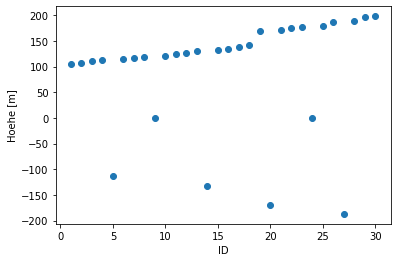

In [5]:
#Visualise data to help data augmentation
plt.scatter(daten["ID"].values,daten["Hoehe"].values)
plt.xlabel("ID")
plt.ylabel("Hoehe [m]")
plt.show()
#Wir sehen dass die meisten Daten eng beisammen liegen und es 6 Ausreisser gibt.
#Die Daten die eng beisammen liegen scheinen aufsteigend: groessere ID bedeutet hoeher.
#Wir vermuten, dass die Daten der Hoehe nach sortiert sind. Hilft uns diese Information um die fehlenden Hoehen zu ergaenzen?

In [6]:
#Funktion die LeistungProFlaeche berechnet basierend auf Leistung und Durchmesser
def LeistungProFlaeche(Leistung_MW, Durchmesser):
    Flaeche = 3.14*(Durchmesser/2)**2
    Leistung_Watt = Leistung_MW*1000000
    return np.round(Leistung_Watt/Flaeche)

In [7]:
#Beispiel erste Zeile der Datentabelle
print(LeistungProFlaeche(Leistung_MW=4, Durchmesser=137))

271.0


In [8]:
#Beispiel ID=7
print(LeistungProFlaeche(Leistung_MW=4, Durchmesser=145))
#Du kannst die Werte aendern, um dir die fehlenden Daten zu berechnen

242.0


In [9]:
#Funktion um den Durchmesser zu berechnen, basierend auf Leistung und LeistungProFlaeche
def Durchmesser(Leistung_MW, Leistung_pro_flaeche):
    flaeche = 1000000*Leistung_MW/Leistung_pro_flaeche
    return np.round(2*np.sqrt(flaeche/np.pi))

In [10]:
#Beispiel zweite Zeile
print(Durchmesser(Leistung_MW=1, Leistung_pro_flaeche=90))

119.0


In [11]:
#Beispiel ID=3
print(Durchmesser(Leistung_MW=2, Leistung_pro_flaeche=167))
#Du kannst die Werte aendern, um dir die fehlenden Daten zu berechnen

123.0


In [12]:
### CLUSTERING ###

In [13]:
#Load corrected data
file = "GirlsDay_Beispiel_Windanlagen_v4_complete.csv"
daten = pd.read_csv(file)

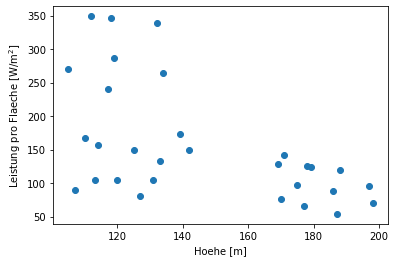

In [14]:
#Visualise Data
plt.scatter(daten["Hoehe"].values,daten["LeistungProFlaeche"].values)
plt.xlabel("Hoehe [m]")
plt.ylabel("Leistung pro Flaeche [W/m$^2$]")
plt.show()
#Frage: Wie wuerdet ihr clustern? Wie viele Gruppen wuerdet ihr empfehlen?

In [15]:
# Perform K-Means on normalised data
std1 = daten["Hoehe"].std()
std2 = daten["LeistungProFlaeche"].std()
print(std1,std2)
#Divide data by standard deviation to scale clusters
daten["Hoehe"] /= std1
daten["LeistungProFlaeche"] /= std2

31.289177740524934 87.73429060023473


Anzahl Gruppen: 2


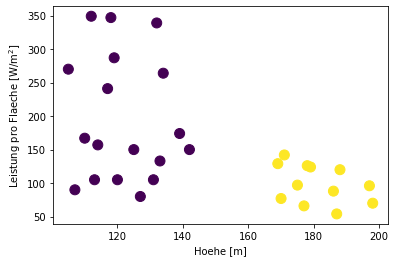

Anzahl Gruppen: 3


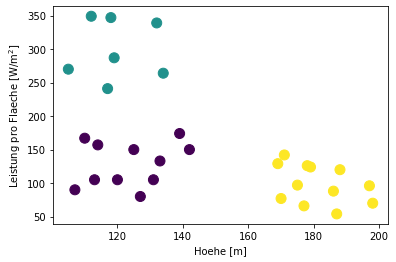

Anzahl Gruppen: 4


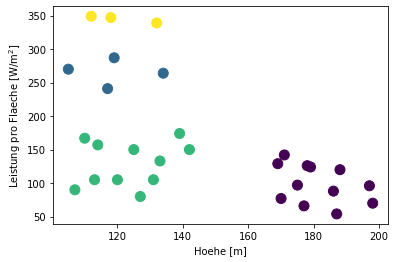

Anzahl Gruppen: 5


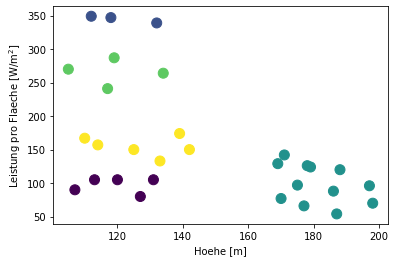

In [16]:
# K-means Clustering
#What is optimal number of clusters?
#loop over number of clusters
for Nclusters in [2,3,4,5]:
    print("Anzahl Gruppen:",Nclusters)
    kmeans = KMeans(n_clusters=Nclusters).fit(daten[['Hoehe','LeistungProFlaeche']])
    centroids = kmeans.cluster_centers_
#    print(centroids)

    plt.scatter(daten["Hoehe"]*std1, daten["LeistungProFlaeche"]*std2, c=kmeans.labels_.astype(float), s=100, alpha=1.0)
#    plt.scatter(centroids[:, 0]*mean2, centroids[:, 1]*mean1, c='red', s=50)
    plt.xlabel("Hoehe [m]")
    plt.ylabel("Leistung pro Flaeche [W/m$^2$]")
    plt.show()